In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate

def sirs(t, y, beta_a, beta_b, beta_ab, gamma_a, gamma_b):
    S, I_a, I_b, I_b_p, I_ab, R_a, D = y
    # S = y[0]; I = y[1]; R = y[2]; 와 동일
    N = y.sum()

    S_to_Ia = S*beta_a*(I_a+I_ab)/float(N)
    S_to_Ib = S*(beta_b*(I_b+I_b_p)+beta_ab*I_ab)/float(N)
    Ia_to_Ra = gamma_a*(I_a+I_ab)
    Ia_to_Iab = I_a*(beta_ab*I_ab+beta_b*(I_b+I_b_p))/float(N)
    Ib_to_Iab = I_b*beta_a*(I_ab+I_a)/float(N)
    Iab_to_Ibp = gamma_a*I_ab
    Ra_to_Ibp = R_a*(beta_ab*I_ab+beta_b*(I_b+I_b_p))/float(N)
    Ib_to_D = gamma_b*I_b
    Ibp_to_D = gamma_b*I_b_p
    Iab_to_D = gamma_b*I_ab 

    dSdt = (S_to_Ia+S_to_Ib)*(-1)
    dI_adt = (S_to_Ia)-(Ia_to_Ra)-(Ia_to_Iab)
    dI_bdt = (S_to_Ib)-(Ib_to_D)-(Ib_to_Iab)
    dI_bpdt = (Ra_to_Ibp)+(Iab_to_Ibp)-(Ibp_to_D)
    dI_abdt = (Ia_to_Iab)-(Iab_to_D)+(Ib_to_Iab)-(Iab_to_Ibp)
    dR_adt = (Ia_to_Ra)-(Ra_to_Ibp)
    dDdt = (Ib_to_D)+(Iab_to_D)+(Ibp_to_D)

    return np.array([dSdt, dI_adt, dI_bdt, dI_bpdt , dI_abdt, dR_adt, dDdt])

In [2]:
def sir(t, y, beta, gamma):
    S, I, R = y
    # S = y[0]; I = y[1]; R = y[2]; 와 동일
    N = y.sum()

    S_to_I = beta * I / N * S
    I_to_R = gamma * I

    dSdt = -S_to_I
    dIdt = S_to_I - I_to_R
    dRdt = I_to_R

    return np.array([dSdt, dIdt, dRdt])

(110.8668069984261, 7.0)


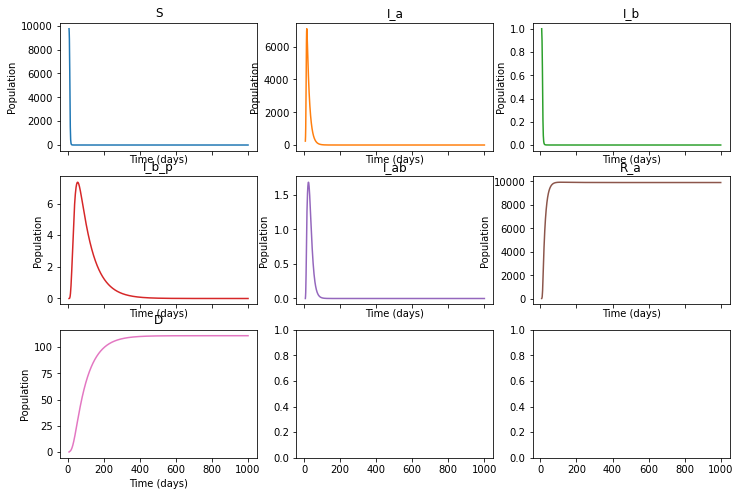

In [4]:
total_population = 10000.0
#y0 = np.array([total_population - 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0])
y0 = np.array([total_population - 1.0, 1.0, 0.0])
Ra= 12
Rb= 0.9
Rab = 2.5
gamma_a = 1/14
gamma_b = 1/8
beta_a = Ra*gamma_a
beta_b = Rb*gamma_b
beta_ab = Rab*gamma_b

T = 1000.0
k = np.arange(0.0,T,1.0)
maximum = (0,0)

for i in range(1,len(k)):
    t_span = (0.0,k[i])
    t_eval = np.arange(t_span[0], t_span[1] + 1)
    sol = sp.integrate.solve_ivp(sir, t_span, y0, t_eval=t_eval, args = (beta_a,gamma_a))
    
    y1 = np.array([total_population - sol.y[1,-1]-sol.y[2,-1]-1, sol.y[1,-1], 1.0, 0.0, 0.0, sol.y[2,-1], 0.0])
    
    t_span = (k[i],T)
    t_eval = np.arange(t_span[0], t_span[1] + 1)
    sol2 = sp.integrate.solve_ivp(sirs, t_span, y1, t_eval=t_eval, args=(beta_a, beta_b, beta_ab, gamma_a, gamma_b))
    
    if(maximum[0]<sol2.y[6][-1]):
        maximum = (sol2.y[6][-1],k[i])

print(maximum)

t_span = (0.0,maximum[1])
t_eval = np.arange(t_span[0], t_span[1] + 1)
sol = sp.integrate.solve_ivp(sir, t_span, y0, t_eval=t_eval, args = (beta_a,gamma_a))

y1 = np.array([total_population - sol.y[1,-1]-1-sol.y[2,-1], sol.y[1,-1], 1.0, 0.0, 0.0, sol.y[2,-1], 0.0])

t_span = (maximum[1],T)
t_eval = np.arange(t_span[0], t_span[1] + 1)
sol2 = sp.integrate.solve_ivp(sirs, t_span, y1, t_eval=t_eval, args=(beta_a, beta_b, beta_ab, gamma_a, gamma_b))

fig, axes = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
z=["S", "I_a", "I_b", "I_b_p", "I_ab", "R_a", "D"]


for i, (c, ax) in enumerate(zip(sol2.y, axes.flat)):
    ax.plot(sol2.t, c , c=f"C{i}")
    ax.set(
        title=f"{z[i]}",
        xlabel="Time (days)",
        ylabel="Population",
    )

plt.show()